In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Hugo's Portfolio/Realized Volatility Predictability through Neural Network and Financial Turbulence Research/New Version/Model 2/DJIA Realized Volatility.xlsx",index_col='Date',parse_dates=True)

In [ ]:
df.head()

,Realised,US Financial Turbulence
Date,,
2017-11-02,0.005718,806.442547
2017-11-03,0.002881,702.337034
2017-11-06,0.001528,529.197112
2017-11-07,0.003651,512.157114
2017-11-08,0.001921,493.752126


# Hyperparameter Search

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from numpy.random import seed
from random import randrange
scaler = MinMaxScaler()

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[3,5,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
23/23 [==============================] - 6s 21ms/step - loss: 0.0032 - acc: 0.0014
Epoch 2/15
23/23 [==============================] - 1s 22ms/step - loss: 0.0025 - acc: 0.0014
Epoch 3/15
23/23 [==============================] - 1s 23ms/step - loss: 0.0019 - acc: 0.0014
Epoch 4/15
23/23 [==============================] - 1s 25ms/step - loss: 0.0017 - acc: 0.0014
Epoch 5/15
23/23 [==============================] - 1s 25ms/step - loss: 0.0016 - acc: 0.0014
Epoch 6/15
23/23 [==============================] - 1s 24ms/step - loss: 0.0015 - acc: 0.0014
Epoch 7/15
23/23 [==============================] - 1s 23ms/step - loss: 0.0015 - acc: 0.0014
Epoch 8/15
23/23 [==============================] - 0s 17ms/step - loss: 0.0015 - acc: 0.0014
Epoch 9/15
23/23 [==============================] - 0s 14ms/step - loss: 0.0014 - acc: 0.0014
Epoch 10/15
23/23 [==============================] - 0s 15ms/step - loss: 0.0014 - acc: 0.0014
Epoch 11/15
23/23 [==============================] - 0s 14m

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
21/21 [==============================] - 4s 38ms/step - loss: 0.0073 - acc: 0.0015
Epoch 2/15
21/21 [==============================] - 1s 37ms/step - loss: 0.0064 - acc: 0.0015
Epoch 3/15
21/21 [==============================] - 1s 39ms/step - loss: 0.0058 - acc: 0.0015
Epoch 4/15
21/21 [==============================] - 1s 37ms/step - loss: 0.0056 - acc: 0.0015
Epoch 5/15
21/21 [==============================] - 1s 47ms/step - loss: 0.0051 - acc: 0.0015
Epoch 6/15
21/21 [==============================] - 1s 59ms/step - loss: 0.0048 - acc: 0.0015
Epoch 7/15
21/21 [==============================] - 1s 37ms/step - loss: 0.0049 - acc: 0.0015
Epoch 8/15
21/21 [==============================] - 1s 37ms/step - loss: 0.0045 - acc: 0.0015
Epoch 9/15
21/21 [==============================] - 1s 33ms/step - loss: 0.0040 - acc: 0.0015
Epoch 10/15
21/21 [==============================] - 1s 36ms/step - loss: 0.0040 - acc: 0.0015
Epoch 11/15
21/21 [==============================] - 1s 40m

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
21/21 [==============================] - 4s 39ms/step - loss: 0.0534 - acc: 0.0015
Epoch 2/3
21/21 [==============================] - 1s 39ms/step - loss: 0.0456 - acc: 0.0015
Epoch 3/3
1/1 [==============================] - 0s 48ms/step
Epoch: 3 | Inputs: 84 | Nodes: 42 | Dropout: 0.4 | Loss: mae
RMSE: 0.002818661284979131 | Accuracy: 47.081114218708244
Epoch 1/15
23/23 [==============================] - 3s 13ms/step - loss: 0.0037 - acc: 0.0014
Epoch 2/15
23/23 [==============================] - 0s 14ms/step - loss: 0.0029 - acc: 0.0014
Epoch 3/15
23/23 [==============================] - 0s 13ms/step - loss: 0.0023 - acc: 0.0014
Epoch 4/15
23/23 [==============================] - 0s 14ms/step - loss: 0.0023 - acc: 0.0014
Epoch 5/15
23/23 [==============================] - 0s 14ms/step - loss: 0.0018 - acc: 0.0014
Epoch 6/15
23/23 [==============================] - 0s 13ms/step - loss: 0.0020 - acc: 0.0014
Epoch 7/15
23/23 [==============================] - 0s 13ms/step - lo

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
22/22 [==============================] - 3s 30ms/step - loss: 0.0026 - acc: 0.0014
Epoch 2/10
22/22 [==============================] - 1s 30ms/step - loss: 0.0022 - acc: 0.0014
Epoch 3/10
22/22 [==============================] - 1s 29ms/step - loss: 0.0018 - acc: 0.0014
Epoch 4/10
22/22 [==============================] - 1s 29ms/step - loss: 0.0017 - acc: 0.0014
Epoch 5/10
22/22 [==============================] - 1s 29ms/step - loss: 0.0016 - acc: 0.0014
Epoch 6/10
22/22 [==============================] - 1s 44ms/step - loss: 0.0016 - acc: 0.0014
Epoch 7/10
22/22 [==============================] - 1s 42ms/step - loss: 0.0015 - acc: 0.0014
Epoch 8/10
22/22 [==============================] - 1s 37ms/step - loss: 0.0015 - acc: 0.0014
Epoch 9/10
22/22 [==============================] - 1s 28ms/step - loss: 0.0015 - acc: 0.0014
Epoch 10/10
1/1 [==============================] - 0s 64ms/step
Epoch: 10 | Inputs: 63 | Nodes: 14 | Dropout: 0 | Loss: huber_loss
RMSE: 0.002784627776980

Epoch: 15 | Inputs: 189 | Nodes: 14 | Dropout: 0.4 | Loss: mae
RMSE: 0.002397544086900391 | Accuracy: 64.97302070321919

In [ ]:
RMSE = []
Accuracy = []

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.8)]
test = df.iloc[int(len(df['Realised'])*0.8):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.8)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 189
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(14, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=15)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)

Epoch 1/15
26/26 [==============================] - 10s 135ms/step - loss: 0.0695 - accuracy: 0.0012 - mean_absolute_error: 0.0695
Epoch 2/15
26/26 [==============================] - 5s 182ms/step - loss: 0.0435 - accuracy: 0.0012 - mean_absolute_error: 0.0435
Epoch 3/15
26/26 [==============================] - 5s 182ms/step - loss: 0.0406 - accuracy: 0.0012 - mean_absolute_error: 0.0406
Epoch 4/15
26/26 [==============================] - 2s 82ms/step - loss: 0.0387 - accuracy: 0.0012 - mean_absolute_error: 0.0387
Epoch 5/15
26/26 [==============================] - 2s 77ms/step - loss: 0.0360 - accuracy: 0.0012 - mean_absolute_error: 0.0360
Epoch 6/15
26/26 [==============================] - 2s 70ms/step - loss: 0.0357 - accuracy: 0.0012 - mean_absolute_error: 0.0357
Epoch 7/15
26/26 [==============================] - 3s 102ms/step - loss: 0.0351 - accuracy: 0.0012 - mean_absolute_error: 0.0351
Epoch 8/15
26/26 [==============================] - 3s 111ms/step - loss: 0.0332 - accuracy:

In [ ]:
RMSE

[0.0028365275720359457,
 0.00288782682400616,
 0.002894736864047845,
 0.0028872202949692307,
 0.0029319990809775834,
 0.0028093570711637933,
 0.0027315877875789918,
 0.002843076072069241,
 0.0027651192144159584,
 0.0027591190117181893]

In [ ]:
Accuracy

[73.11036096466688,
 72.3830675294143,
 73.52505547562184,
 74.643814764506,
 73.61368240705445,
 72.0600386188351,
 73.79063779891112,
 73.40835672707135,
 70.21266901592136,
 73.40065936009911]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.8):].reset_index()

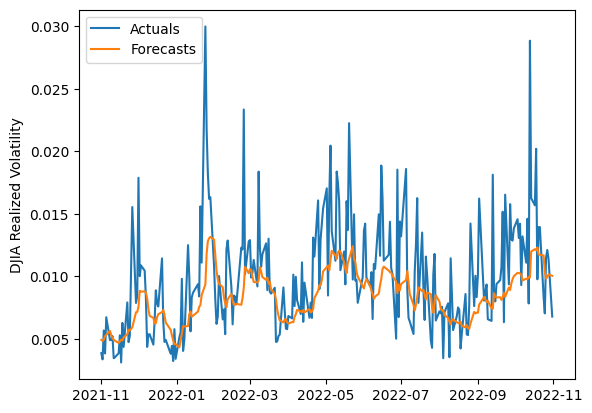

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("DJIA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

In [ ]:
forecasts=true_predictions

In [ ]:
my_df = {'Forecasts': forecasts.reshape(252)}
df = pd.DataFrame(my_df)
df.to_csv('Model 2 DJIA Forecasts.csv', index = True)